In [1]:
import numpy as np
import pandas as pd

import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import *

from sklearn.neural_network import MLPRegressor

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/usr/local/lib/python3.5/dist-pac

In [98]:
train = pd.read_csv('data/sales_train.csv')
trainOG = pd.read_csv('data/sales_train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
items = pd.read_csv('data/items.csv')
item_categories = pd.read_csv('data/item_categories.csv')
shop = pd.read_csv('data/shops.csv')

In [4]:
print(train.shape)
print(test.shape)

(2935849, 6)
(214200, 3)


In [5]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [7]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
shop.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [99]:
# Remove duplicated rows
print('Before drop train shape:', train.shape)
train.drop_duplicates(subset=['date', 'date_block_num', 'shop_id', 'item_id', 'item_cnt_day'], keep='first', inplace=True)
train.reset_index(drop=True, inplace=True)
print('After drop train shape:', train.shape)

Before drop train shape: (2935849, 6)
After drop train shape: (2935825, 6)


In [100]:
# Check for outliers
print('item_price Stats')
print('Min: ', train.item_price.min())
print('Max: ', train.item_price.max())
print('Mean: ', train.item_price.mean())
print('Median: ', train.item_price.median())
print(' ')
print(train.item_price.value_counts().sort_index(ascending=False))

item_price Stats
Min:  -1.0
Max:  307980.0
Mean:  890.855786146
Median:  399.0
 
 307980.000000       1
 59200.000000        1
 50999.000000        1
 49782.000000        1
 42990.000000        4
 42000.000000        1
 41990.000000        3
 40991.000000        1
 40900.000000        1
 37991.000000        2
 36990.000000        4
 35991.000000        1
 35990.000000        3
 35490.000000        5
 35300.000000        5
 35192.000000        1
 34990.000000       12
 34490.000000        1
 33990.000000        1
 33490.000000        8
 32997.500000        1
 32990.000000       57
 32490.000000        4
 32437.000000        1
 32382.000000        1
 32199.000000       16
 32092.000000        1
 31990.000000       19
 31699.000000        1
 31599.000000        1
                  ... 
 4.400000            1
 4.333333            1
 4.300000            1
 4.235294            1
 4.142857            1
 4.055556            1
 4.029126            1
 4.000000          105
 3.800000            2

In [101]:
# Remove -1 and 307980
print('before train shape:', train.shape)
train = train[(train.item_price > 0) & (train.item_price < 300000)]
print('after train shape:', train.shape)

before train shape: (2935825, 6)
after train shape: (2935823, 6)


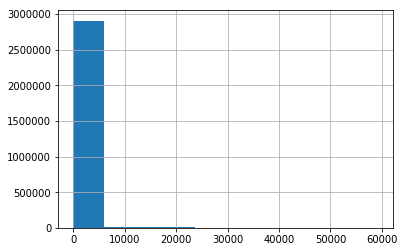

In [13]:
train.item_price.hist()


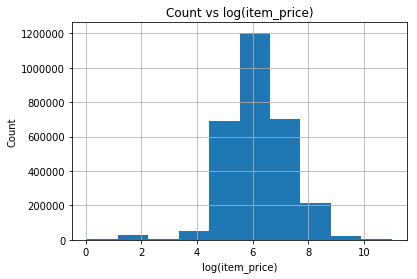

In [102]:
train.item_price.map(np.log1p).hist()
plt.xlabel('log(item_price)')
plt.ylabel('Count')
plt.title('Count vs log(item_price)')

In [15]:
print('item_cnt_day Stats')
print('Min: ', train.item_cnt_day.min())
print('Max: ', train.item_cnt_day.max())
print('Mean: ', train.item_cnt_day.mean())
print('Median', train.item_cnt_day.median())

item_cnt_day Stats
Min:  -22.0
Max:  2169.0
Mean:  1.242643034
Median 1.0


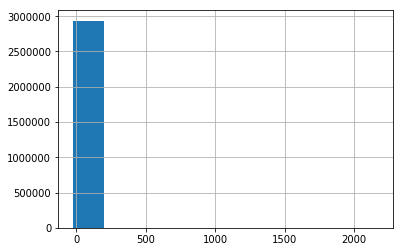

In [16]:
train.item_cnt_day.hist()

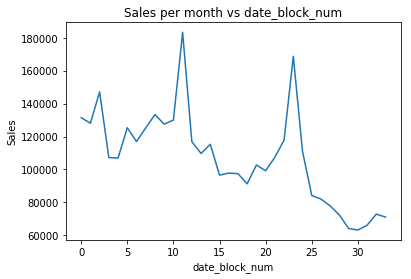

In [17]:
plt.plot(train.groupby('date_block_num').sum()['item_cnt_day'])
plt.title('Sales per month vs date_block_num')
plt.xlabel('date_block_num')
plt.ylabel('Sales')

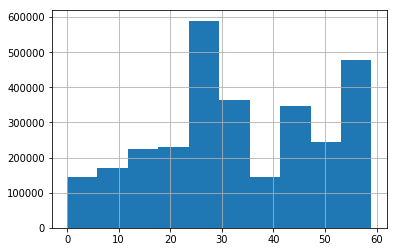

In [18]:
train.shop_id.hist()

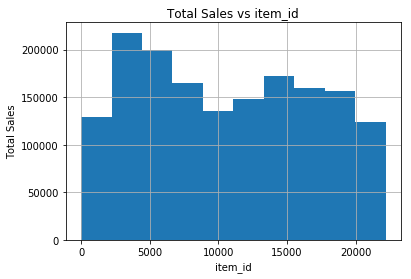

In [96]:
train.item_id.hist()
plt.title('Total Sales vs item_id')
plt.xlabel('item_id')
plt.ylabel('Total Sales')

In [20]:
print('Overall Counts:')
print('# of date_block_num:', train.date_block_num.nunique())
print('# of shop ids:', train.shop_id.nunique())
print('# of item ids:', train.item_id.nunique())
print('max # of total combinations:', train.date_block_num.nunique()*train.shop_id.nunique()*train.item_id.nunique())

Overall Counts:
# of date_block_num: 34
# of shop ids: 60
# of item ids: 21806
max # of total combinations: 44484240


In [21]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [22]:
# Create Text Features

feature_cnt = 25
items = items[['item_id', 'item_category_id']]
items.head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40


In [23]:
tfidf = feature_extraction.text.TfidfVectorizer(max_features=feature_cnt)
item_categories['item_category_name_len'] = item_categories['item_category_name'].map(len)  #Lenth of Item Category Description
item_categories['item_category_name_wc'] = item_categories['item_category_name'].map(lambda x: len(str(x).split(' '))) #Item Category Description Word Count
txtFeatures = pd.DataFrame(tfidf.fit_transform(item_categories['item_category_name']).toarray())
cols = txtFeatures.columns
for i in range(feature_cnt):
    item_categories['item_category_name_tfidf_' + str(i)] = txtFeatures[cols[i]]
item_categories.head()

,item_category_name,item_category_id,item_category_name_len,item_category_name_wc,item_category_name_tfidf_0,item_category_name_tfidf_1,item_category_name_tfidf_2,item_category_name_tfidf_3,item_category_name_tfidf_4,item_category_name_tfidf_5,...,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24
0,PC - Гарнитуры/Наушники,0,23,3,0.0,0.0,0.0,1.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Аксессуары - PS2,1,16,3,0.0,0.0,0.0,0.0,0.780837,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Аксессуары - PS3,2,16,3,0.0,0.0,0.0,0.0,0.000000,0.780837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Аксессуары - PS4,3,16,3,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Аксессуары - PSP,4,16,3,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Make Monthly
train['date'] = pd.to_datetime(train['date'], format='%d.%m.%Y')
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train = train.drop(['date','item_price'], axis=1)
train = train.groupby([c for c in train.columns if c not in ['item_cnt_day']], as_index=False)[['item_cnt_day']].sum()
train = train.rename(columns={'item_cnt_day':'item_cnt_month'})#Monthly Mean
shop_item_monthly_mean = train[['shop_id','item_id','item_cnt_month']].groupby(['shop_id','item_id'], as_index=False)[['item_cnt_month']].mean()
shop_item_monthly_mean = shop_item_monthly_mean.rename(columns={'item_cnt_month':'item_cnt_month_mean'})
#Add Mean Feature
train = pd.merge(train, shop_item_monthly_mean, how='left', on=['shop_id','item_id'])
#Last Month (Oct 2015)
shop_item_prev_month = train[train['date_block_num']==33][['shop_id','item_id','item_cnt_month']]
shop_item_prev_month = shop_item_prev_month.rename(columns={'item_cnt_month':'item_cnt_prev_month'})
shop_item_prev_month.head()
#Add Previous Month Feature
train = pd.merge(train, shop_item_prev_month, how='left', on=['shop_id','item_id']).fillna(0.)
#Items features
train = pd.merge(train, items, how='left', on='item_id')
#Item Category features
train = pd.merge(train, item_categories, how='left', on='item_category_id')
# #Shops features
# train = pd.merge(train, shop, how='left', on='shop_id')
train.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month,item_cnt_month_mean,item_cnt_prev_month,item_category_id,item_category_name,...,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24
0,0,0,32,1,2013,6.0,8.0,0.0,40,Кино - DVD,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,33,1,2013,3.0,3.0,0.0,37,Кино - Blu-Ray,...,0.0,0.520482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,35,1,2013,1.0,7.5,0.0,40,Кино - DVD,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,43,1,2013,1.0,1.0,0.0,40,Кино - DVD,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,51,1,2013,2.0,2.5,0.0,57,Музыка - MP3,...,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
test['month'] = 11
test['year'] = 2015
test['date_block_num'] = 34
#Add Mean Feature
test = pd.merge(test, shop_item_monthly_mean, how='left', on=['shop_id','item_id']).fillna(0.)
#Add Previous Month Feature
test = pd.merge(test, shop_item_prev_month, how='left', on=['shop_id','item_id']).fillna(0.)
#Items features
test = pd.merge(test, items, how='left', on='item_id')
#Item Category features
test = pd.merge(test, item_categories, how='left', on='item_category_id')
# #Shops features
# test = pd.merge(test, shop, how='left', on='shop_id')
test['item_cnt_month'] = 0.
test.head()

,ID,shop_id,item_id,month,year,date_block_num,item_cnt_month_mean,item_cnt_prev_month,item_category_id,item_category_name,...,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24,item_cnt_month
0,0,5,5037,11,2015,34,1.444444,0.0,19,Игры - PS3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,5320,11,2015,34,0.000000,0.0,55,Музыка - CD локального производства,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,11,2015,34,2.000000,1.0,19,Игры - PS3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5,5232,11,2015,34,1.000000,0.0,23,Игры - XBOX 360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,5268,11,2015,34,0.000000,0.0,20,Игры - PS4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
for c in ['item_category_name']:

    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train[c].unique())+list(test[c].unique()))
    train[c] = lbl.fit_transform(train[c].astype(str))
    test[c] = lbl.fit_transform(test[c].astype(str))
    print(c)

item_category_name


In [27]:
x1 = train[train['date_block_num']<33]
y1 = np.log1p(x1['item_cnt_month'].clip(0.,20.))
col = [c for c in train.columns if c not in ['item_cnt_month']]
x1 = x1[col]

x2 = train[train['date_block_num']==33]
y2 = np.log1p(x2['item_cnt_month'].clip(0.,20.))
x2 = x2[col]

x1Linear = train[train['date_block_num']<33]
y1Linear = np.log1p(x1Linear['item_cnt_month'].clip(0.,20.))
x1Linear = x1Linear[['date_block_num', 'shop_id', 'item_id']]

x2Linear = train[train['date_block_num']==33]
x2Linear = x2Linear[['date_block_num', 'shop_id', 'item_id']]

fullsetX = train
fullsetY = np.log1p(fullsetX['item_cnt_month'].clip(0.,20.))
fullsetX = fullsetX[col] 

fulltestX = test
fulltestY = np.log1p(fulltestX['item_cnt_month'].clip(0.,20.))
fulltestX = fulltestX[col] 

In [28]:
x1.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month_mean,item_cnt_prev_month,item_category_id,item_category_name,item_category_name_len,...,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24
0,0,0,32,1,2013,8.0,0.0,40,40,10,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,33,1,2013,3.0,0.0,37,37,14,...,0.0,0.520482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,35,1,2013,7.5,0.0,40,40,10,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,43,1,2013,1.0,0.0,40,40,10,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,51,1,2013,2.5,0.0,57,57,12,...,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
print('item_cnt_month Stats')
print('Min: ', train.item_cnt_month.min())
print('Max: ', train.item_cnt_month.max())
print('Mean: ', train.item_cnt_month.mean())
print('Median', train.item_cnt_month.median())

item_cnt_month Stats
Min:  -22.0
Max:  2253.0
Mean:  2.26718529286
Median 1.0


In [37]:
# Linear Regression Model
regr = linear_model.LinearRegression()
regr.fit(x1Linear,y1Linear)
y_predL = regr.predict(x2Linear).clip(0.,20.)

print("Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y2.clip(0.,20.), y_predL)))

Root Mean squared error (RMSE): 0.45


In [31]:
# # Predict total monthly sales for final month of available training 
# # by removing final month from training data for test set


# # reg = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
# #                learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
# #                random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
# #                nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
# #                epsilon=1e-08)

# reg = MLPRegressor(hidden_layer_sizes=(100,), verbose=True)
# reg.fit(x1,y1)
# y_pred = reg.predict(x2).clip(0.,20.)

# print("Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y2.clip(0.,20.), y_pred)))

In [32]:
reg = MLPRegressor(hidden_layer_sizes=(100,), random_state=33, tol=0.00001, verbose=True)
reg.fit(x1,y1)
y_pred = reg.predict(x2).clip(0.,20.)

print("100 nodes - Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y2.clip(0.,20.), y_pred)))

reg = MLPRegressor(hidden_layer_sizes=(36,), random_state=33, tol=0.00001, verbose=True)
reg.fit(x1,y1)
y_pred = reg.predict(x2).clip(0.,20.)

print("36 nodes - Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y2.clip(0.,20.), y_pred)))


Iteration 1, loss = 313.67216401
Iteration 2, loss = 12.19923160
Iteration 3, loss = 11.76268162
Iteration 4, loss = 10.27166354
Iteration 5, loss = 9.17174293
Iteration 6, loss = 8.49701742
Iteration 7, loss = 8.05225465
Iteration 8, loss = 6.74280718
Iteration 9, loss = 6.48322790
Iteration 10, loss = 5.90364078
Iteration 11, loss = 5.25473882
Iteration 12, loss = 4.83836154
Iteration 13, loss = 4.71511669
Iteration 14, loss = 4.44960777
Iteration 15, loss = 4.12186657
Iteration 16, loss = 3.73774645
Iteration 17, loss = 3.52475980
Iteration 18, loss = 3.35761744
Iteration 19, loss = 3.13002798
Iteration 20, loss = 2.89209272
Iteration 21, loss = 2.73711281
Iteration 22, loss = 2.55631283
Iteration 23, loss = 2.34753404
Iteration 24, loss = 2.22428758
Iteration 25, loss = 2.14138338
Iteration 26, loss = 1.84058332
Iteration 27, loss = 1.69799119
Iteration 28, loss = 1.55933484
Iteration 29, loss = 1.44297202
Iteration 30, loss = 1.34340164
Iteration 31, loss = 1.36459796
Iteration 32

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(35,), alpha=0.0001, tol=0.00001, verbose=True)
reg.fit(x1,y1)
y_pred = reg.predict(x2).clip(0.,20.)


print("0.0001 - Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y2.clip(0.,20.), y_pred)))

reg = MLPRegressor(hidden_layer_sizes=(35,), alpha=0.00001, tol=0.00001, verbose=True)
reg.fit(x1,y1)
y_pred = reg.predict(x2).clip(0.,20.)

print("0.00001 - Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y2.clip(0.,20.), y_pred)))

reg = MLPRegressor(hidden_layer_sizes=(35,), alpha=0.001, tol=0.00001, verbose=True)
reg.fit(x1,y1)
y_pred = reg.predict(x2).clip(0.,20.)

print("0.001 - Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y2.clip(0.,20.), y_pred)))

In [34]:
reg = MLPRegressor(hidden_layer_sizes=(100,), random_state=33, tol=0.00001, verbose=True)
reg.fit(x1,y1)
y_pred = reg.predict(x2).clip(0.,20.)

print("50 nodes - Root Mean squared error (RMSE): %.2f" % np.sqrt(metrics.mean_squared_error(y2.clip(0.,20.), y_pred)))


Iteration 1, loss = 313.67216401
Iteration 2, loss = 12.19923160
Iteration 3, loss = 11.76268162
Iteration 4, loss = 10.27166354
Iteration 5, loss = 9.17174293
Iteration 6, loss = 8.49701742
Iteration 7, loss = 8.05225465
Iteration 8, loss = 6.74280718
Iteration 9, loss = 6.48322790
Iteration 10, loss = 5.90364078
Iteration 11, loss = 5.25473882
Iteration 12, loss = 4.83836154
Iteration 13, loss = 4.71511669
Iteration 14, loss = 4.44960777
Iteration 15, loss = 4.12186657
Iteration 16, loss = 3.73774645
Iteration 17, loss = 3.52475980
Iteration 18, loss = 3.35761744
Iteration 19, loss = 3.13002798
Iteration 20, loss = 2.89209272
Iteration 21, loss = 2.73711281
Iteration 22, loss = 2.55631283
Iteration 23, loss = 2.34753404
Iteration 24, loss = 2.22428758
Iteration 25, loss = 2.14138338
Iteration 26, loss = 1.84058332
Iteration 27, loss = 1.69799119
Iteration 28, loss = 1.55933484
Iteration 29, loss = 1.44297202
Iteration 30, loss = 1.34340164
Iteration 31, loss = 1.36459796
Iteration 32

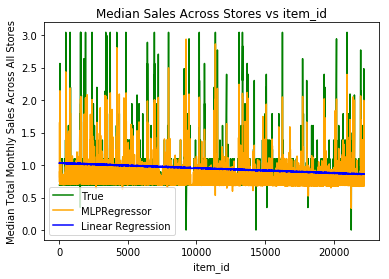

In [93]:

truelist = {'item_cnt_month': y2}
truePred = pd.DataFrame(data=truelist)
truePred = pd.concat([x2[['shop_id', 'item_id']], truePred], axis=1)
mlplist = {'item_cnt_month': y_pred}
mlpPred = pd.DataFrame(data=mlplist)
mlpPred.index += 1577592
mlpPred = pd.concat([x2[['shop_id', 'item_id']], mlpPred], axis=1)
baselist = {'item_cnt_month': y_predL}
basePred = pd.DataFrame(data=baselist)
basePred.index += 1577592
basePred = pd.concat([x2[['shop_id', 'item_id']], basePred], axis=1)

true = truePred.groupby(['item_id'], as_index=False)[['item_cnt_month']].median()
mlpModel = mlpPred.groupby(['item_id'], as_index=False)[['item_cnt_month']].median()
baseline = basePred.groupby(['item_id'], as_index=False)[['item_cnt_month']].median()

itemids = true['item_id']

# print(true)
# print(mlpModel)
# print(baseline)

truePlot = plt.plot(itemids, true[['item_cnt_month']], label='True', color='g')
MLPPlot = plt.plot(itemids, mlpModel[['item_cnt_month']], label='MLPRegressor', color='orange')
basePlot = plt.plot(itemids, baseline[['item_cnt_month']], label='Linear Regression',color='blue')
plt.xlabel('item_id')
plt.ylabel('Median Total Monthly Sales Across All Stores')
plt.title('Median Sales Across Stores vs item_id')
plt.legend(numpoints=1)
plt.show()

In [55]:
x2.head()

,date_block_num,shop_id,item_id,month,year,item_cnt_month_mean,item_cnt_prev_month,item_category_id,item_category_name,item_category_name_len,...,item_category_name_tfidf_15,item_category_name_tfidf_16,item_category_name_tfidf_17,item_category_name_tfidf_18,item_category_name_tfidf_19,item_category_name_tfidf_20,item_category_name_tfidf_21,item_category_name_tfidf_22,item_category_name_tfidf_23,item_category_name_tfidf_24
1577592,33,2,31,10,2015,1.600000,1.0,37,37,14,...,0.0,0.520482,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1577593,33,2,486,10,2015,1.777778,3.0,73,73,28,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.652927,0.0
1577594,33,2,787,10,2015,1.000000,1.0,49,49,33,...,0.0,0.000000,0.568572,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1577595,33,2,794,10,2015,1.000000,1.0,73,73,28,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.652927,0.0
1577596,33,2,968,10,2015,1.000000,1.0,40,40,10,...,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [68]:
itemids

0            0
1            1
2            2
3            3
4            4
5            5
6            6
7            7
8            8
9            9
10          10
11          11
12          12
13          13
14          14
15          15
16          16
17          17
18          18
19          19
20          20
21          21
22          22
23          23
24          24
25          25
26          26
27          27
28          28
29          29
         ...  
22140    22140
22141    22141
22142    22142
22143    22143
22144    22144
22145    22145
22146    22146
22147    22147
22148    22148
22149    22149
22150    22150
22151    22151
22152    22152
22153    22153
22154    22154
22155    22155
22156    22156
22157    22157
22158    22158
22159    22159
22160    22160
22161    22161
22162    22162
22163    22163
22164    22164
22165    22165
22166    22166
22167    22167
22168    22168
22169    22169
Name: item_id, Length: 22170, dtype: int64

In [81]:
jg = mlpPred[['shop_id','item_id', 'item_cnt_month']].groupby(['item_id'])

for key, item in jg:
    print jg.get_group(key), "\n\n"

SyntaxError: invalid syntax (<ipython-input-81-4a7c1a7662f2>, line 4)

In [94]:
baseline

,item_id,item_cnt_month
0,30,1.030263
1,31,1.031943
2,32,1.028223
3,33,1.030240
4,40,1.030187
5,42,1.038610
6,45,1.030149
7,49,1.025899
8,51,1.038710
9,53,1.033800
